In [1]:
import pandas as pd
import networkx as nx
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datos_nodo = pd.read_csv('datos_nodos_prueba.csv')
datos_nodo.head()

,nombre,estacion
0,A,Observatorio
1,B,Tacubaya
2,C,Juanacatlán
3,D,Chapultepec
4,E,Sevilla


In [4]:
datos_nodo.set_index('nombre', inplace = True)
datos_nodo.head()

,estacion
nombre,
A,Observatorio
B,Tacubaya
C,Juanacatlán
D,Chapultepec
E,Sevilla


In [7]:
rutas_nodo = pd.read_csv('nodos_prueba.csv')
rutas_nodo.head()

,origen,destino,peso
0,A,B,1
1,B,C,1
2,CI,B,1
3,B,DH,1
4,B,CK,1


In [8]:
DG=nx.DiGraph()
for filas in rutas_nodo.iterrows():
    DG.add_edge(filas[1]["origen"],
               filas[1]["destino"],
               peso=filas[1]["peso"])
DG.nodes(data=True)

NodeDataView({'A': {}, 'B': {}, 'C': {}, 'CI': {}, 'DH': {}, 'CK': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'H': {}, 'AH': {}, 'I': {}, 'AJ': {}, 'CQ': {}, 'J': {}, 'CR': {}, 'K': {}, 'FZ': {}, 'L': {}, 'GB': {}, 'M': {}, 'BA': {}, 'N': {}, 'BC': {}, 'EO': {}, 'O': {}, 'P': {}, 'Q': {}, 'R': {}, 'S': {}, 'T': {}, 'BG': {}, 'DS': {}, 'DQ': {}, 'AA': {}, 'AB': {}, 'BS': {}, 'AC': {}, 'BU': {}, 'AD': {}, 'BM': {}, 'AE': {}, 'BO': {}, 'AF': {}, 'CO': {}, 'AG': {}, 'EV': {}, 'FV': {}, 'CP': {}, 'AK': {}, 'AL': {}, 'DK': {}, 'AM': {}, 'DI': {}, 'AN': {}, 'AO': {}, 'AP': {}, 'FK': {}, 'AQ': {}, 'FL': {}, 'AR': {}, 'AS': {}, 'AT': {}, 'AU': {}, 'AV': {}, 'AW': {}, 'AX': {}, 'AY': {}, 'BK': {}, 'AZ': {}, 'BL': {}, 'ER': {}, 'BD': {}, 'DN': {}, 'BE': {}, 'CU': {}, 'CW': {}, 'CT': {}, 'BH': {}, 'BI': {}, 'EL': {}, 'BJ': {}, 'EN': {}, 'BP': {}, 'BQ': {}, 'BV': {}, 'BX': {}, 'BY': {}, 'BZ': {}, 'CA': {}, 'CB': {}, 'CC': {}, 'CD': {}, 'CF': {}, 'CG': {}, 'CH': {}, 'CL': {}, 'CM': {}, 'FM': {}, 'CN': 

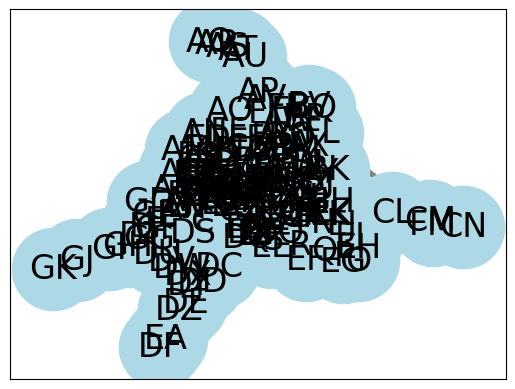

In [9]:
nx.draw_networkx(DG,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=4,with_labels=True,node_size=3500,)

In [42]:
list(nx.all_shortest_paths(DG, source = "CA", target = "T", weight = None))

[['CA',
  'CB',
  'CC',
  'CD',
  'CF',
  'CG',
  'CH',
  'CI',
  'B',
  'DH',
  'DI',
  'DK',
  'DN',
  'DO',
  'DP',
  'DQ',
  'T']]

In [45]:
resultadoRuta = list(nx.dijkstra_path(DG, source = "CA", target = "T", weight = "peso"))

In [36]:
datos_nodo.loc['T']['estacion']

'Pantitlán'

In [44]:
def ruta(ruta):
    total_peso=0
    for i in range(len(ruta)-1):
        origen=ruta[i]
        destino=ruta[i+1]
        peso=DG[origen][destino]["peso"]
        total_peso=total_peso+peso
        print(" %s->%s\n Peso: %s " % 
              (datos_nodo.loc[origen]['estacion'],
               datos_nodo.loc[destino]['estacion'],peso))
    print("\n Peso total=%s"%(total_peso))

In [46]:
ruta(resultadoRuta)

 El Rosario->Aquiles Serdán
 Peso: 1 
 Aquiles Serdán->Camarones
 Peso: 1 
 Camarones->Refineria
 Peso: 1 
 Refineria->San Joaquín
 Peso: 1 
 San Joaquín->Polanco
 Peso: 1 
 Polanco->Auditorio
 Peso: 1 
 Auditorio->Constituyentes
 Peso: 1 
 Constituyentes->Tacubaya
 Peso: 1 
 Tacubaya->Patriotismo
 Peso: 1 
 Patriotismo->Chilpancingo
 Peso: 1 
 Chilpancingo->Lázaro Cárdenas
 Peso: 1 
 Lázaro Cárdenas->Mixiuhca
 Peso: 1 
 Mixiuhca->Velódromo
 Peso: 1 
 Velódromo->Ciudad Deportiva
 Peso: 1 
 Ciudad Deportiva->Puebla
 Peso: 1 
 Puebla->Pantitlán
 Peso: 1 

 Peso total=16
